In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
y = np.array([0,1,3,3,2])

one-hot encoding

In [6]:
Y = np.zeros((len(y), 4))
for i in range(len(y)):
    Y[i][y[i]] = 1
Y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Use Numpy only

In [13]:
np.eye(4)[y]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [22]:
Y = np.zeros((len(y), 4))
Y[np.arange(5), y] = 1
Y
### row 0 has one at y[0]
### row 1 has one at y[1]
### [0,1,2,3,4] [y[0], y[1], ..., y[4]] = y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

Use pandas

In [23]:
s = pd.Series(y)
pd.get_dummies(s)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


Use sklearn

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# enc.fit(y[:, np.newaxis])
# y_model = enc.transform(y[:, np.newaxis])
y_model = enc.fit_transform(y[:, np.newaxis])
y_model.toarray()

/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

For digit recognition,  
`y = [0,1, ..., 9]`

In [35]:
names = np.array(['A']*50 + ['B']*50 + ['C']*50)
prices = np.concatenate([
        100 + np.random.randn(50), 
        300 + np.random.randn(50), 
        200 + np.random.randn(50), 
    ])
X = names[:, np.newaxis]
y = prices
print(X.shape)
print(y.shape)

(150, 1)
(150,)


Ordinal encoding  
transform `n` discrete categories into `0, ..., n-1`   
'A' -> 0  
'B' -> 1  
'C' -> 2

In [37]:
from sklearn.preprocessing import OrdinalEncoder
### similar to LabelEncoder
enc = OrdinalEncoder()
new_X = enc.fit_transform(X)
print(new_X.shape)

(150, 1)


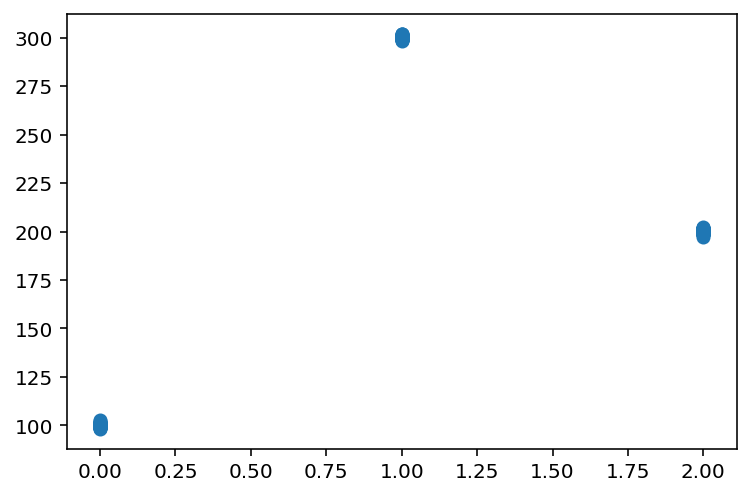

In [40]:
plt.scatter(new_X[:, 0], y)

In [41]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(OneHotEncoder(), 
                     LinearRegression(fit_intercept=False))
pipe.fit(new_X, y)
y_model = pipe.predict(new_X)
print(y_model.shape)

(150,)


/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [46]:
pipe.steps[1][1].coef_

array([100.10539971, 300.23989847, 200.04140741])

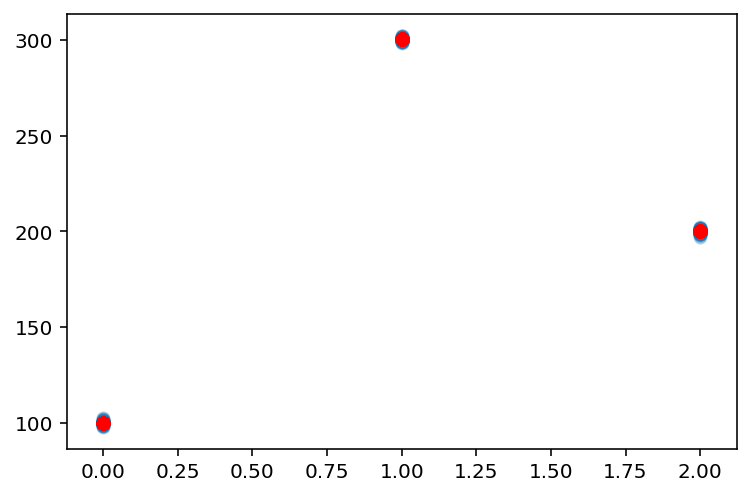

In [45]:
plt.scatter(new_X[:,0], y, alpha=0.3)
plt.scatter(new_X[:,0], y_model, color='red')